In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torchvision import models
from torchvision import transforms as tf
import torch.nn.functional as F

In [9]:
import os
os.getcwd()
os.chdir('~\\NeuralNetworkProjects\\Style Transfer')

In [4]:
vgg = models.vgg19(pretrained = True).features

for param in vgg.parameters():
    param.requires_grad_(False)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\Anuj/.cache\torch\checkpoints\vgg19-dcbb9e9d.pth


In [5]:
device = torch.device("cpu")

if torch.cuda.is_available():
    device = torch.device("cuda")
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [6]:
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)

In [19]:
#Transform the image that will work with our pretrained model
def transformation(img):
    
    tasks = tf.Compose([tf.Resize(256),
                       tf.ToTensor(),
                       tf.Normalize(mean, std)])
    
    img = tasks(img)
    img = img.unsqueeze(0)
    
    return img

In [10]:
#Multi-channel image
content_img = Image.open("cat.jpeg").convert("RGB")
style_img = Image.open("TheStarryNight.jpg").convert("RGB")

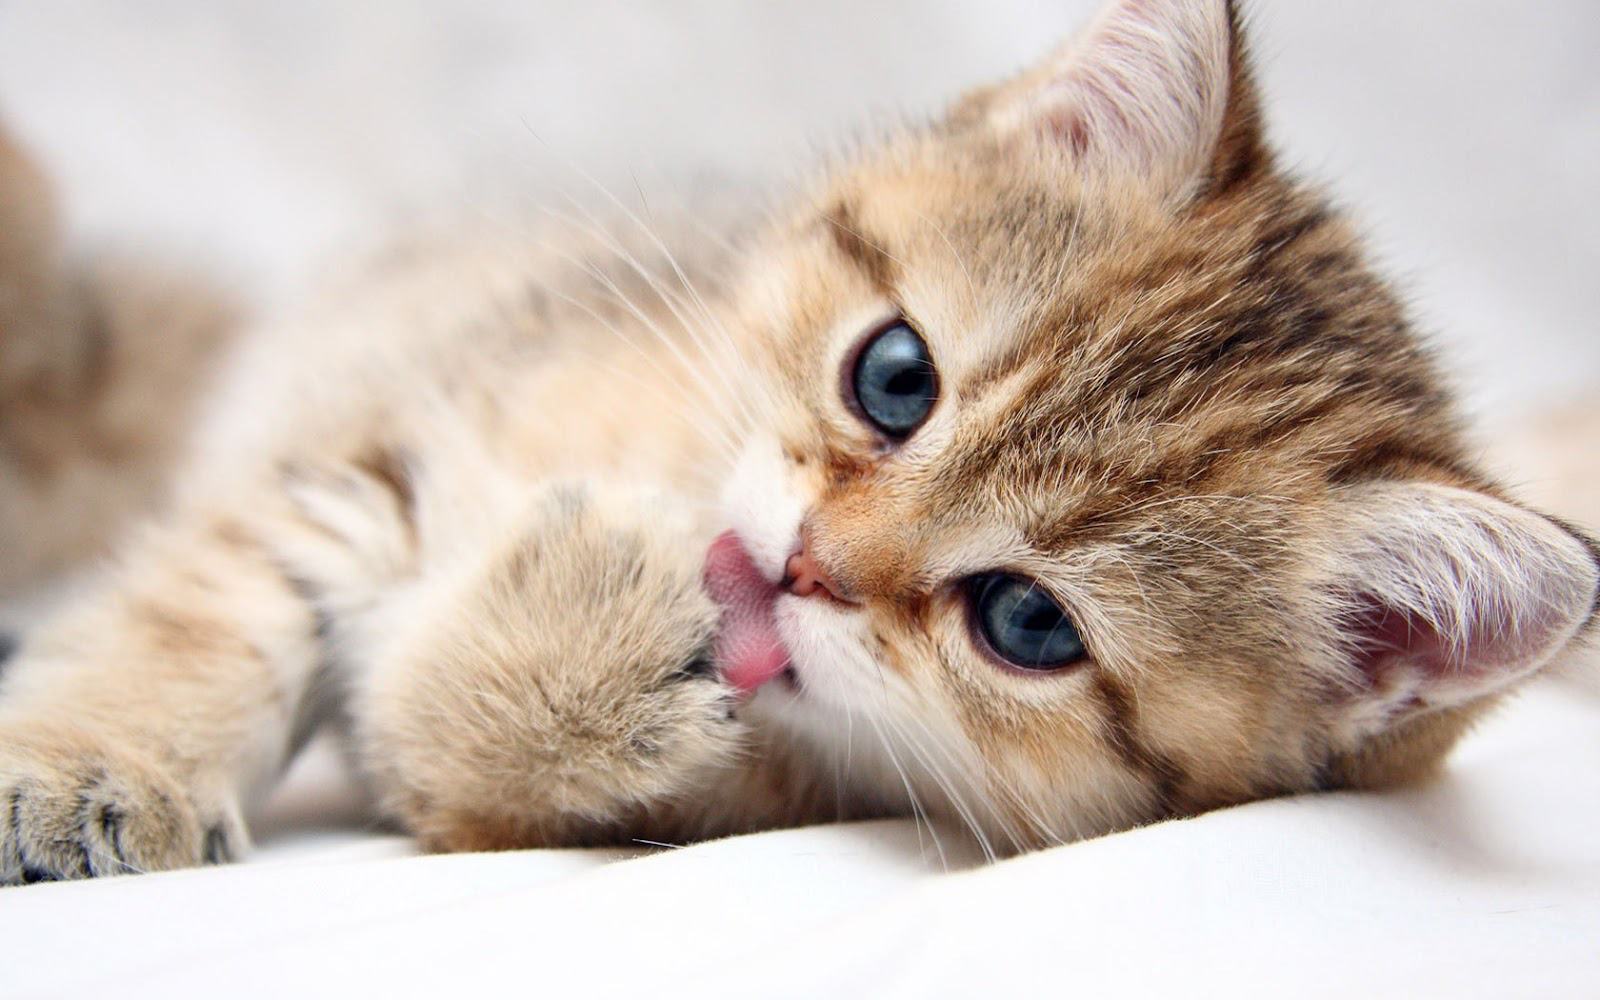

In [11]:
content_img

In [12]:
content_img.size

(1600, 1000)

In [16]:
#Individual pixel representations 
list(content_img.getdata())

[(212, 211, 217),
 (212, 211, 217),
 (212, 211, 217),
 (213, 212, 218),
 (213, 212, 218),
 (214, 213, 219),
 (214, 213, 218),
 (215, 214, 219),
 (216, 215, 220),
 (216, 215, 220),
 (216, 215, 220),
 (216, 215, 220),
 (216, 215, 220),
 (216, 215, 220),
 (216, 215, 220),
 (217, 216, 221),
 (218, 215, 222),
 (218, 215, 222),
 (218, 215, 222),
 (219, 216, 223),
 (219, 216, 223),
 (219, 217, 222),
 (219, 217, 222),
 (219, 217, 222),
 (220, 218, 223),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 221),
 (219, 217, 220),
 (219, 217, 220),
 (219, 217, 220),
 (219, 217, 220),
 (219, 217, 220),
 (219, 217, 220),
 (219, 217, 220),
 (219, 217, 220),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 221),
 (220, 218, 219),
 (220, 218, 219),
 (220, 218, 219),
 (220, 218, 219),
 (220, 218, 219),
 (220, 218, 219),
 (220, 218, 221),
 (220, 218

In [17]:
style_img.size

(1280, 720)

In [20]:
content_img = transformation(content_img).to(device)
style_img = transformation(style_img).to(device)

In [22]:
#content_img
style_img

tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044, -

In [23]:
content_img.shape #Batch: 1 Number of dimensions: 3 Resized pixels: 256x409

torch.Size([1, 3, 256, 409])

In [24]:
style_img.shape

torch.Size([1, 3, 256, 455])

In [25]:
def tensor_to_image(tensor):
    
    image = tensor.clone().detach()
    image = image.cpu().numpy().squeeze() #Sqeeze: Sqweezes out all size one dimensions
    
    image = image.transpose(1, 2, 0) 
    #Denormalizing the image that we normalized before
    image *= np.array(std) + np.array(mean)
    image = image.clip(0, 1)
    
    return image

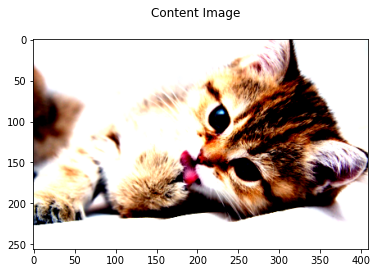

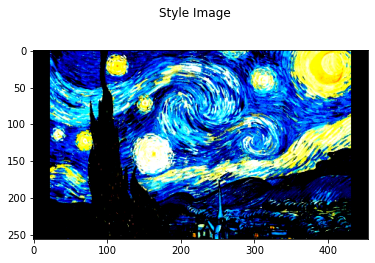

In [27]:
img = tensor_to_image(content_img)
fig = plt.figure()
fig.suptitle('Content Image')
plt.imshow(img)

img = tensor_to_image(style_img)
fig = plt.figure()
fig.suptitle('Style Image')
plt.imshow(img)

In [63]:
#using earlier convulation layers: details and later layers: complex
#The feature maps of convulational layers hold content information regarding 
#edges and lines
'''
LAYERS_OF_INTEREST = {   '0': 'conv1_1',
                         '5': 'con2_1',
                         '10': 'conv3_1',
                         '19': 'conv4_1',
                         '21': 'conv4_2',
                         '28': 'conv5_1' }
'''
LAYERS_OF_INTEREST = {'0': 'conv1_1', 
                      '3': 'conv2_1',  
                      '4': 'conv3_1',
                      '5': 'conv4_1',
                      '6': 'conv5_1',
                      '7': 'conv6_1',  
                      '8': 'conv7_1',
                      '9': 'conv8_1'}

In [64]:
def apply_model_and_extract_features(image, model):
    x = image
    features = {} #feature maps of the interested layers
    
    for name, layer in model._modules.items():
        x = layer(x) #pass the input image through the layer and store the feature map
        
        if name in LAYERS_OF_INTEREST:
            features[LAYERS_OF_INTEREST[name]] = x
    
    return features

In [65]:
content_img_features = apply_model_and_extract_features(content_img, vgg)
style_img_features = apply_model_and_extract_features(style_img, vgg)

In [66]:
content_img_features

{'conv1_1': tensor([[[[0.7716, 1.4293, 1.4601,  ..., 1.1430, 1.1245, 0.7027],
           [0.6875, 1.2036, 1.2270,  ..., 0.9294, 0.9207, 0.6247],
           [0.7233, 1.2432, 1.2579,  ..., 0.9279, 0.9195, 0.6236],
           ...,
           [1.2033, 1.8654, 1.8705,  ..., 1.7193, 1.7116, 1.2927],
           [1.1897, 1.8446, 1.8489,  ..., 1.7022, 1.6826, 1.2672],
           [0.3631, 0.6753, 0.6803,  ..., 0.5933, 0.5786, 0.3320]],
 
          [[0.0000, 2.0714, 2.1017,  ..., 1.9689, 1.9695, 3.9944],
           [0.0000, 0.2653, 0.2694,  ..., 0.3745, 0.3833, 3.8346],
           [0.0000, 0.3024, 0.2884,  ..., 0.3572, 0.3534, 3.8326],
           ...,
           [0.0000, 0.3258, 0.2886,  ..., 0.3167, 0.3196, 5.3862],
           [0.0000, 0.2895, 0.2654,  ..., 0.3479, 0.3360, 5.3395],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.4782]],
 
          [[0.7345, 0.5049, 0.5343,  ..., 0.2610, 0.2441, 0.0000],
           [1.2551, 0.5600, 0.5978,  ..., 0.3073, 0.3038, 0.0000],
           [1

In [67]:

def calculate_gram_matrix(tensor):
    
    _, channels, height, width = tensor.size()
    #1D vector for the feature maps for each input channel
    tensor = tensor.view(channels, height*width)
    
    gram_matrix = torch.mm(tensor, tensor.t())
    #Normalizing: dividing the gram matrix by number of elements in the feature maps
    #Reason: Larger feature maps wont disproportionately affect the result
    gram_matrix = gram_matrix.div(channels*height*width)
    
    return gram_matrix


In [68]:
#Training the weights of the target image

style_features_gram_matrix = {layer: calculate_gram_matrix(style_img_features[layer]) for layer in style_img_features}

style_features_gram_matrix

{'conv1_1': tensor([[3.6202e-03, 2.7382e-03, 1.9235e-03,  ..., 2.6130e-03, 1.0538e-03,
          3.9386e-03],
         [2.7382e-03, 2.1103e-02, 7.0081e-04,  ..., 1.1276e-02, 2.7174e-03,
          1.0151e-02],
         [1.9235e-03, 7.0081e-04, 2.1176e-03,  ..., 2.1243e-05, 5.0643e-04,
          1.3191e-03],
         ...,
         [2.6130e-03, 1.1276e-02, 2.1243e-05,  ..., 4.6537e-02, 8.5345e-03,
          1.3862e-02],
         [1.0538e-03, 2.7174e-03, 5.0643e-04,  ..., 8.5345e-03, 5.7263e-03,
          2.9053e-03],
         [3.9386e-03, 1.0151e-02, 1.3191e-03,  ..., 1.3862e-02, 2.9053e-03,
          2.1727e-02]]),
 'conv2_1': tensor([[5.5131e-02, 1.1336e-03, 2.8185e-03,  ..., 5.3636e-02, 1.5605e-03,
          1.1063e-02],
         [1.1336e-03, 1.0727e-03, 3.6732e-07,  ..., 5.2576e-04, 1.6340e-06,
          7.8079e-04],
         [2.8185e-03, 3.6732e-07, 1.0064e-02,  ..., 6.9901e-03, 4.4833e-04,
          3.1634e-03],
         ...,
         [5.3636e-02, 5.2576e-04, 6.9901e-03,  ..., 1.030

In [69]:
'''weights = {'conv1_1': 1.0, 'conv2_1':0.75, 'conv3_1':0.35,
          'conv4_1': 0.25, 'conv5_1': 0.15}'''
weights = {'conv1_1': 1.0, 'conv2_1': 0.8, 'conv3_1': 0.65,
           'conv4_1': 0.5, 'conv5_1': 0.45, 'conv6_1': 0.3, 
           'conv7_1': 0.1, 'conv8_1': 0.15}

In [70]:
target = content_img.clone().requires_grad_(True).to(device)

optimizer = optim.Adam([target], lr = 0.003)

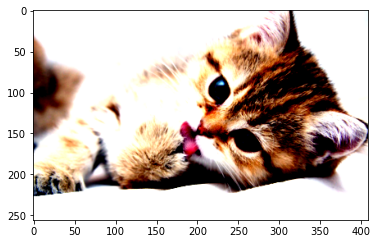

In [71]:
plt.figure()

plt.imshow(tensor_to_image(target))

In [72]:
for i in range(1, 2000):
    #Pass the target image to the vgg19 pretrained model. return target feature dictionary that contains feature map representations of our current target image of the layers 
    target_features = apply_model_and_extract_features(target, vgg)
    
    content_loss = F.mse_loss(target_features['conv7_1'], content_img_features['conv7_1'])
    style_loss = 0
    
    for layer in weights:
        target_feature = target_features[layer]
        #to get style information we need to calculate the target gram matrix
        target_gram_matrix = calculate_gram_matrix(target_feature)
        style_gram_matrix = style_features_gram_matrix[layer]
        
        layer_loss = F.mse_loss(target_gram_matrix, style_gram_matrix)
        layer_loss *= weights[layer]
        
        _, channels, height, width = target_feature.shape
        
        style_loss += layer_loss
    #due to the huge different between content_loss and style_loss scales so we multiply the style_loss with 10^6 so style and content loss are similar
    total_loss = 1000000 * style_loss + content_loss
    if i%50 == 0:
        print('Epoch {}:, Style Loss: {:3f}, Content Loss: {:3f}'.format(i, style_loss, content_loss))
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step() #Will update the weights of the target image.

Epoch 50:, Style Loss: 0.000757, Content Loss: 3.077785
Epoch 100:, Style Loss: 0.000400, Content Loss: 4.322646
Epoch 150:, Style Loss: 0.000283, Content Loss: 4.560151
Epoch 200:, Style Loss: 0.000222, Content Loss: 4.699883
Epoch 250:, Style Loss: 0.000183, Content Loss: 4.807309
Epoch 300:, Style Loss: 0.000154, Content Loss: 4.900050
Epoch 350:, Style Loss: 0.000131, Content Loss: 4.982810
Epoch 400:, Style Loss: 0.000113, Content Loss: 5.059350
Epoch 450:, Style Loss: 0.000099, Content Loss: 5.130687
Epoch 500:, Style Loss: 0.000086, Content Loss: 5.195722
Epoch 550:, Style Loss: 0.000076, Content Loss: 5.257103
Epoch 600:, Style Loss: 0.000068, Content Loss: 5.314264
Epoch 650:, Style Loss: 0.000061, Content Loss: 5.367154
Epoch 700:, Style Loss: 0.000055, Content Loss: 5.416274
Epoch 750:, Style Loss: 0.000049, Content Loss: 5.461952
Epoch 800:, Style Loss: 0.000045, Content Loss: 5.503466
Epoch 850:, Style Loss: 0.000041, Content Loss: 5.541394
Epoch 900:, Style Loss: 0.000038

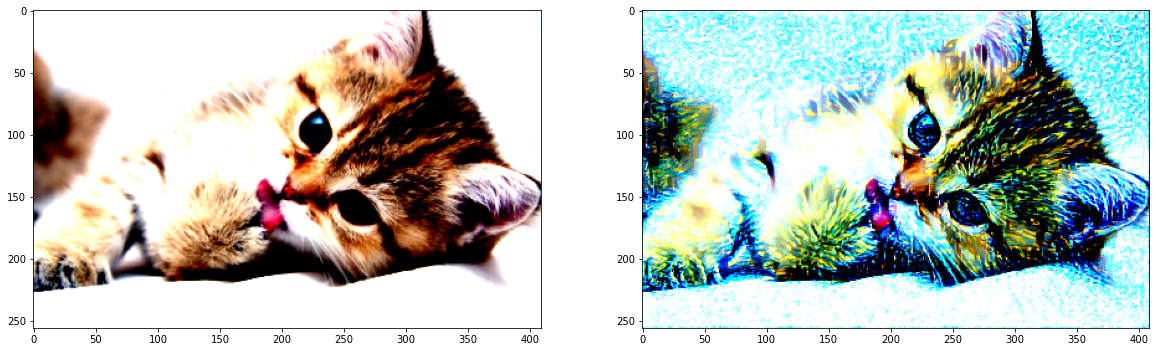

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(tensor_to_image(content_img))
ax2.imshow(tensor_to_image(target))